# Primer modelo lineal

Vamos a hacer nuestro primer modelo usando datos sintéticos para familiarizarnos con la sintaxis que cada una de las librerías requiere.

# Importaciones

In [3]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Generamos el conjunto de datos

Vamos a generar de manera sintética los datos necesarios para el siguiente modelo:

$$Y = \beta_0 + \beta_1 \boldsymbol X_1 + \boldsymbol\beta \boldsymbol X_{\text{clases}} + \varepsilon$$
$$\varepsilon \sim \mathsf{N}(0,\sigma^2)$$

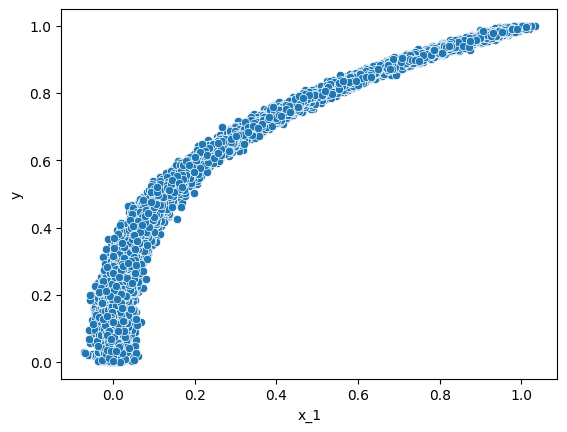

In [4]:
tamano = 10000
np.random.seed(100)


# Predictores
y = np.random.random(tamano)

# Respuesta
x_1 = y ** 3 + np.random.normal(0, 0.02, tamano)

# Datos
data = pd.DataFrame({'y' : y, 'x_1' : x_1})
sns.scatterplot(x = 'x_1', y = 'y', data=data)

y = data.loc[:, data.columns == "y"]
X = data.loc[:, data.columns != "y"]

In [3]:
data

y       x_1
0     0.543405  0.178579
1     0.278369  0.034851
2     0.424518  0.073252
3     0.844776  0.581632
4     0.004719 -0.021788
...        ...       ...
9995  0.609612  0.200055
9996  0.295009  0.035427
9997  0.360738  0.058362
9998  0.033316  0.006225
9999  0.092429  0.012753

[10000 rows x 2 columns]

# Distancia de cook sin outliers

Vamos a generar un modelo lineal sobre este conjunto de datos y observar las distancias de cook que obtenemos. En este caso, no debería haber ninguna por encima de 1, pues como hemos visto en el gráfico todas las observaciones siguen una tendencia clara.

In [5]:
modelo = smf.ols(formula = 'y ~ x_1', data = data)
results = modelo.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                 5.057e+04
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:41:50   Log-Likelihood:                 7228.9
No. Observations:               10000   AIC:                        -1.445e+04
Df Residuals:                    9998   BIC:                        -1.444e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2670      0.002    171.183      0.000       0.264       0.270
x_1            0.9281      0.004    224.882      0.000       0.920       0.936
==============================================================================
Omnibus:                     1415.832   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              842.867
Skew:                          -0.581   Prob(JB):                    9.41e-184
Kurtosis:                       2.181   Cond. No.                         3.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

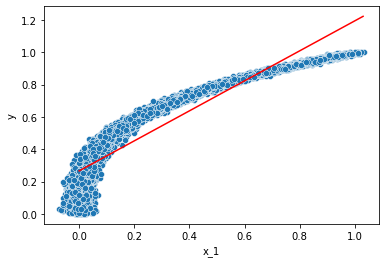

In [5]:
x_1_preds = [i for i in np.arange(0.0, max(data['x_1']), 0.01)]
y_hat = results.predict({'x_1': x_1_preds})
preds = {'x' : x_1_preds, 'y_hat': y_hat}

sns.scatterplot(x = 'x_1', y = 'y', data=data)
sns.lineplot(x = 'x', y = 'y_hat', data = preds, color = 'red')
plt.show()

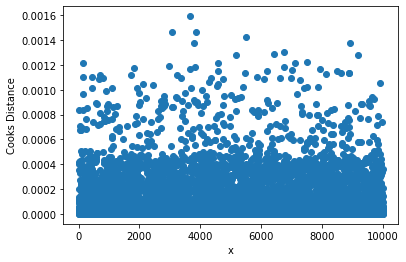

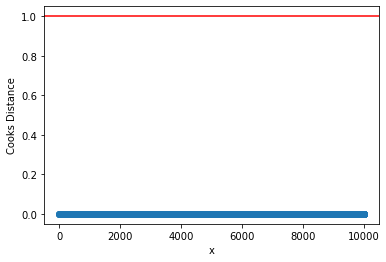

In [6]:
cook = results.get_influence().cooks_distance

plt.scatter(list(data.index), cook[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

plt.scatter(list(data.index), cook[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.axhline(y = 1, color = 'r', linestyle = '-')
plt.show()

# Distancia de cook con outlier

Vamos a añadir un outlier intencionalmente para observar cómo aumenta esa distancia de Cook, hasta el punto que se detecta como un outlier.

In [7]:
data['y'][3] = 5
data['x_1'][3] = 2
data

y       x_1
0     0.543405  0.178579
1     0.278369  0.034851
2     0.424518  0.073252
3     5.000000  2.000000
4     0.004719 -0.021788
...        ...       ...
9995  0.609612  0.200055
9996  0.295009  0.035427
9997  0.360738  0.058362
9998  0.033316  0.006225
9999  0.092429  0.012753

[10000 rows x 2 columns]

In [8]:
modelo = smf.ols(formula = 'y ~ x_1', data = data)
results = modelo.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                 4.853e+04
Date:                Fri, 09 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:28:52   Log-Likelihood:                 6938.7
No. Observations:               10000   AIC:                        -1.387e+04
Df Residuals:                    9998   BIC:                        -1.386e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2657      0.002    165.595      0.000       0.263       0.269
x_1            0.9343      0.004    220.305      0.000       0.926       0.943
==============================================================================
Omnibus:                     3698.034   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           388658.233
Skew:                           0.800   Prob(JB):                         0.00
Kurtosis:                      33.500   Cond. No.                         3.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

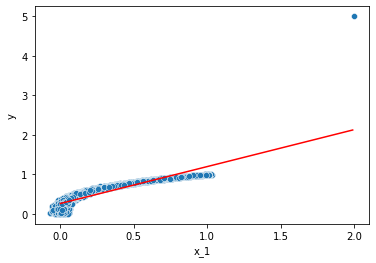

In [9]:
x_1_preds = [i for i in np.arange(0.0, max(data['x_1']), 0.01)]
y_hat = results.predict({'x_1': x_1_preds})
preds = {'x' : x_1_preds, 'y_hat': y_hat}

sns.scatterplot(x = 'x_1', y = 'y', data=data)
sns.lineplot(x = 'x', y = 'y_hat', data = preds, color = 'red')
plt.show()

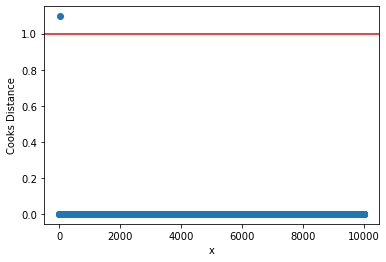

In [10]:
cook = results.get_influence().cooks_distance

plt.scatter(list(data.index), cook[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.axhline(y = 1, color = 'r', linestyle = '-')
plt.show()